# Extract Frames

Extract frames and get thumbnail images for checking accuracy

In [2]:
import cv2
from IPython.display import display, Image
from tqdm import tqdm

TIME_INTERVAL = 5.0 # second(s)

VIDEO_PATH = '../../Temp/我们村里的年轻人（续集）.mp4'

Running with OpenCV version 4.7.0
Video name: 我们村里的年轻人（续集）


Extracting frames: 5395.0it [00:27, 186.46it/s]                                       


1079 frames extracted with the time interval of 5.0 secs.
Last frame example:


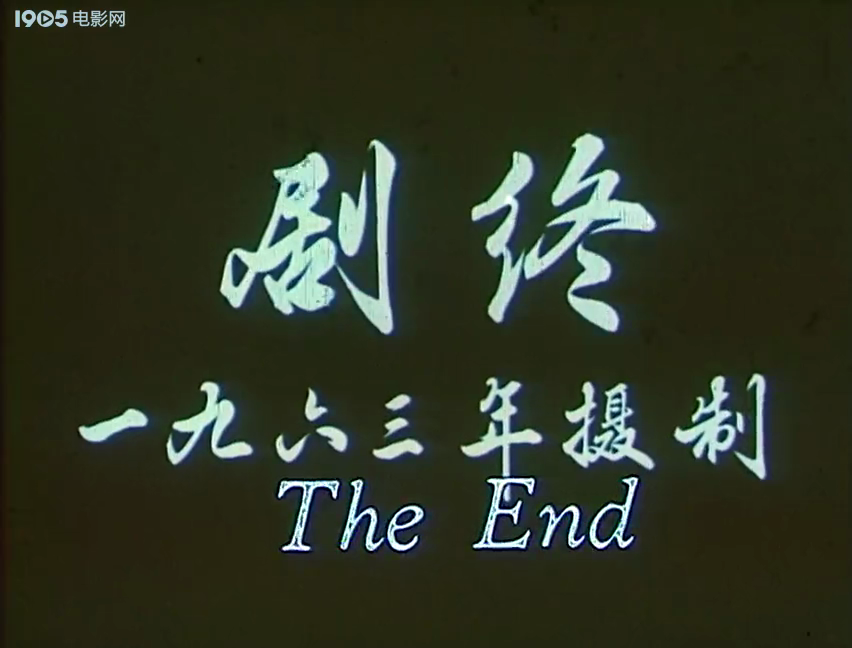

Extracting frames: 5395.0it [00:27, 193.07it/s]


In [3]:
print("Running with OpenCV version " + cv2.__version__)

VIDEO_NAME = VIDEO_PATH.split('/')[-1]
if VIDEO_NAME.endswith('.mp4'):
	VIDEO_NAME = VIDEO_NAME[:-4]
print("Video name: " + VIDEO_NAME)

def extractImages(pathIn, pathOut, export_thumbnails=False, thumbnail_path="./thumbnails/cache/", thumbnail_interval=1, thumbnail_scale=0.25):
	"""
	Parameters
	----------
	export_thumbnails: boolean, whether to export thumbnails
	thumbnail_path: string, path (relative) to save thumbnails
	thumbnail_interval: int, after how many frames to save a thumbnail
	"""
    
	count = 0
	vidcap = cv2.VideoCapture(pathIn)
	success,image = vidcap.read()
	success = True
	total_secs = vidcap.get(cv2.CAP_PROP_FRAME_COUNT) / vidcap.get(cv2.CAP_PROP_FPS)

	p_bar = tqdm(total=total_secs, desc='Extracting frames')
	#p_bar = FloatProgress(min=0, max=total_secs, description='Extracting frames')
	#display(p_bar)

	while success:
		pos = count*TIME_INTERVAL # seconds
		if pos > total_secs:
			break
		
		vidcap.set(cv2.CAP_PROP_POS_MSEC, pos * 1000)
		p_bar.update(TIME_INTERVAL)
		#p_bar.value = pos
		success,image = vidcap.read()
		
		target = pathOut + f"/{VIDEO_NAME}-{count}.png"
		#print('sec {} of {} ({})'.format(pos, total_secs, target))
		cv2.imwrite(filename=target, img=image)
		count = count + 1

		if export_thumbnails and count % thumbnail_interval == 0:
			# save a thumbnail with 1/4 size of the original image
			thumb = cv2.resize(image, (0, 0), fx=thumbnail_scale, fy=thumbnail_scale)
			thumbnail_target = thumbnail_path + f"{VIDEO_NAME}-thumb{count}.jpg"
			cv2.imwrite(filename=thumbnail_target, img=thumb)
        
	vidcap.release()
	print(f'\n{count} frames extracted with the time interval of {TIME_INTERVAL} secs.\nLast frame example:')
	display(Image(target)) # show the last frame as an example

extractImages(VIDEO_PATH, "./Temp", export_thumbnails=True, thumbnail_interval=30, thumbnail_scale=0.25)

# Clear Caches

Clear all cached frame images

In [4]:
# Delete all images in the Temp folder
import os

cleared = 0

for file in os.listdir("./Temp/"):
    if file.endswith(".png"):
            cleared += 1
            os.remove(os.path.join("./Temp", file))
            
print(f"\n{cleared} images cleared.")


1079 images cleared.


# Compress thumbnails (Optional)

Run the cell below to create a ZIP of the thumbnail images and delete the thumbnail images

In [5]:
import shutil

zip_name = ""
try:
    if VIDEO_NAME is None:
        zip_name = "thumbnails"
except NameError:
    zip_name = "thumbnails"
else:
    zip_name = VIDEO_NAME + "-thumbnails"

shutil.make_archive(f"./thumbnails/{zip_name}", 'zip', "./thumbnails/cache/")

cleared = 0

# Delete all images in the thumbnails folder
for file in os.listdir("./thumbnails/cache/"):
    if file.endswith(".jpg"):
            cleared += 1
            os.remove(os.path.join("./thumbnails/cache", file))
            
print(f"\n{cleared} thumbnails compressed.")


35 thumbnails compressed.
